In [86]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import kolmogorov

In [87]:
N = 100
m = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
alpha = 0.05

In [88]:
def check_p_value(p_value):
    if p_value <= alpha:
        print("Гипотеза H0 отвергается")
    else:
        print("Нет оснований отвергнуть H0")

In [89]:
# Проверка на равномерное распределение
expected_uniform = np.full(10, N / 10)
chi2_stat_uniform, p_value_uniform = stats.chisquare(m, expected_uniform)

print(chi2_stat_uniform)
print(f"p-value: {p_value_uniform:.4f}")
check_p_value(p_value_uniform)

16.4
p-value: 0.0590
Нет оснований отвергнуть H0


In [ ]:
# Проверка на нормальное распределение

data = np.repeat(np.arange(10), m)
mu = np.mean(data)
sigma = np.std(data, ddof=1)

bins = np.array([-np.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, np.inf])
cdf_values = stats.norm.cdf(bins, loc=mu, scale=sigma)

expected_normal = N * np.diff(cdf_values)
expected_normal *= N / expected_normal.sum()

chi2_stat = np.sum((m - expected_normal)**2 / expected_normal)

df = len(m) - 1 - 2

p_value = 1 - stats.chi2.cdf(chi2_stat, df)

print(chi2_stat)
print(f"p-value: {p_value:.5f}")

check_p_value(p_value)

16.87106704806873
p-value: 0.01825
Гипотеза H0 отвергается


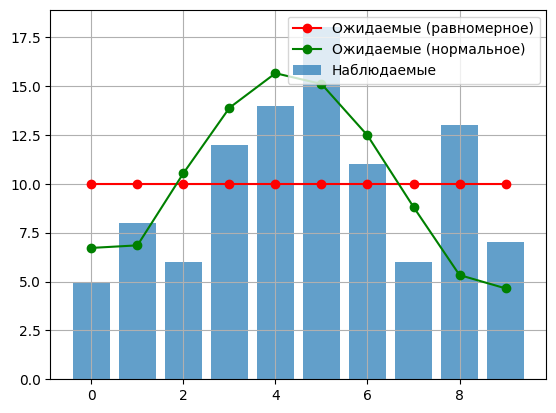

In [91]:
# Визуализация
plt.bar(np.arange(10), m, alpha=0.7, label='Наблюдаемые')
plt.plot(np.arange(10), expected_uniform, 'ro-', label='Ожидаемые (равномерное)')
plt.plot(np.arange(10), expected_normal, 'go-', label='Ожидаемые (нормальное)')
plt.legend()
plt.grid()
plt.show()

In [92]:
# Проверка по Колмогорову

F_emp = np.array([sum(m[:i]) for i in range(len(m) + 1)]) / N
F_th = np.arange(10) / 10

delta = np.sqrt(N) * np.max([max(np.abs(F_th[i] - F_emp[i]),
                                 np.abs(F_th[i] - F_emp[i+1]))
                                 for i in range(F_th.size)])

p_value = kolmogorov(delta)

print(f"p-value: {p_value}")
check_p_value(p_value)

p-value: 0.039681879538114355
Гипотеза H0 отвергается


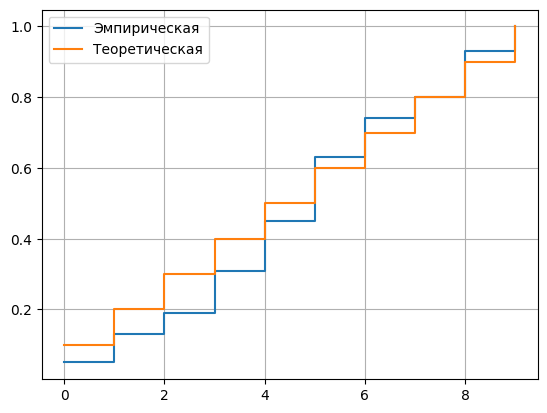

In [93]:
plt.step(np.arange(10), F_emp[1:], where='post', label="Эмпирическая")
plt.step(np.arange(10), np.arange(1, 11) / 10, where='post', label="Теоретическая")
plt.legend()
plt.grid()
plt.show()

In [94]:
# Проверка по Колмогорову

n_bootstrap_iterations = 50_000

def norm(val, mu, std_dev):
    return 0.5 * (1 + math.erf((val - mu)/(np.sqrt(2) * std_dev)))

def empirical_norm(val): 
    return norm(val, mu_hat, std_dev_hat)

def bootstrap_norm(j):
    return norm(bootstrap_sample[j], mu_bootstrap, std_dev_bootstrap)


intervals = np.array([(-np.inf, 1)] + [(i, i + 1) for i in range(1, 9)] + [(9, np.inf)])
data = np.repeat(np.arange(len(m)), m)

mu_hat = np.mean(data)
std_dev_hat = np.std(data, ddof=1)

bootstrap_statistics = []

values = np.arange(10)
test_statistic = np.sqrt(N) * np.max([max(np.abs(empirical_norm(values[i]) - F_emp[i]),
                                      np.abs(empirical_norm(values[i]) - F_emp[i + 1]))
                                      for i in range(10)])

for _ in range(n_bootstrap_iterations):
    bootstrap_sample = np.array(sorted(np.random.normal(mu_hat, std_dev_hat, N)))
    mu_bootstrap = bootstrap_sample.mean()
    std_dev_bootstrap = np.std(bootstrap_sample, ddof=1)

    F_bootstrap_empirical = [i / N for i in range(N + 1)]


    bootstrap_sup = np.sqrt(N) * np.max([max(np.abs(bootstrap_norm(j) - F_bootstrap_empirical[j]), \
                                         np.abs(bootstrap_norm(j) - F_bootstrap_empirical[j+1])) \
                                         for j in range(len(bootstrap_sample))])

    bootstrap_statistics.append(bootstrap_sup)

bootstrap_statistics = np.array(bootstrap_statistics)

p_value = len(bootstrap_statistics[bootstrap_statistics >= test_statistic]) / n_bootstrap_iterations

print(f"p-value: {p_value}")
check_p_value(p_value)

p-value: 0.0144
Гипотеза H0 отвергается


## a
${\chi}^2$ не отверг H0, 
Калмогоров отвёрг H0

## б
${\chi}^2$  отверг H0, 
Калмогоров отвёрг H0